---

# Mastère Spécialisé Expert en Science des données

---
## OPTIMISATION SUR PYTHON
---

*Auteur :* Paquarse Mahouvi

*Date:* 20-05-2024
---

# Mix électrique renouvelable en 2050

Fin 2018, la France a publié sa Stratégie Nationale Bas Carbone (SNBC), qui définit la manière d’atteindre les objectifs de neutralité carbone en France en 2050. En particulier, la SNBC décrit comment les usages électriques pourraient se développer pour atteindre la neutralité carbone.

L’objectif est d’analyser comment répondre aux projections de demande de la SNBC en déterminant un mix électrique neutre en carbone, à l’horizon 2050. Ce système électrique sera composé de moyens de production renouvelables : fermes éoliennes, fermes solaires, centrales thermiques à l’hydrogène. 

# Importation des librairies

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
sns.set_style("white")

In [130]:
data_dir = "data/"
mix = pd.read_csv(data_dir + "eco2mix-national-cons-def.csv", sep=";", index_col=False, low_memory=False)
parc = pd.read_csv(data_dir + "parc-prod-par-filiere.csv", sep=";", index_col=False, low_memory=False)

In [131]:
mix.head(5)

,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données définitives,2012-07-27,08:30,2012-07-27T08:30:00+02:00,48800.0,49200,49100,287.0,3136.0,...,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,France,Données définitives,2012-07-27,10:00,2012-07-27T10:00:00+02:00,52878.0,53800,53100,286.0,3389.0,...,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2012-07-27,10:45,2012-07-27T10:45:00+02:00,NaN,54800,54200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,France,Données définitives,2012-07-27,14:45,2012-07-27T14:45:00+02:00,NaN,54300,53950,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2012-07-27,15:30,2012-07-27T15:30:00+02:00,52736.0,52700,52400,284.0,3278.0,...,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce jeu de données, rafraîchi une fois par jour, présente les données consolidées depuis janvier 2021 et définitives (de janvier 2012 à décembre 2020) issues de l'application éCO2mix. Elles sont élaborées à partir des comptages et complétées par des forfaits. Elle contient au pas demi-heure 
- La consommation réalisée
- La production selon les différentes filières composant le mix énergétique (Fioul, Charbon...)
- La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).
- Les échanges physiques aux frontières.
- Une estimation des émissions de carbone générées par la production d'électricité en France.
- Les échanges commerciaux aux frontières.
- Le découpage des filières par technologie du mix de production (débute en 2013).

In [132]:
data = pd.DataFrame()
data.index =  mix.columns
data['count_NaN'] = mix.isna().sum()
data['dtypes'] = mix.dtypes
data['uniq'] = mix.nunique()
data['repeat'] = mix.shape[0] - data['uniq']
data['shape'] = mix.shape[0]
data

,count_NaN,dtypes,uniq,repeat,shape
Périmètre,0,object,1,248543,248544
Nature,0,object,1,248543,248544
Date,0,object,2589,245955,248544
Heure,0,object,96,248448,248544
Date et Heure,0,object,248516,28,248544
Consommation (MW),124272,float64,44568,203976,248544
Prévision J-1 (MW),0,int64,1981,246563,248544
Prévision J (MW),0,int64,2177,246367,248544
Fioul (MW),124272,float64,2373,246171,248544
Charbon (MW),124272,float64,5567,242977,248544


In [133]:
del data

Les données de consommation sont au pas demi-heure. Les données au pas quart-heure sont donc vides (NA). Elles seront supprimées de la base de données. 

# Question 1 : création d'un profil de demande

Afin que le système soit adapté aux variations de demande, il est nécessaire de déterminer un profil de consommation, c’est-à-dire la manière dont la consommation fluctue au cours d’une année.

## Question 1.1 - Récupération des données de consommation en 2017 
### Calculer l’énergie consommée en MWh pour chaque demi-heure.

In [134]:
# Sélection des lignes avec l'année 2017 et les colonnes 'Eolienne' et 'Solaire'
df = mix.loc[mix['Date'].str.contains('2017'), ['Date', 'Heure', 'Date et Heure', 'Consommation (MW)']] # 2017 et variables concernees
df = df.dropna() # Suppression des pas au quart-heure
df.drop_duplicates(subset=['Date et Heure'], inplace=True) # Pour les changements 
df = df.sort_values(by="Date et Heure") # Trie selon la date et heure
df.head()

,Date,Heure,Date et Heure,Consommation (MW)
84711,2017-01-01,00:00,2017-01-01T00:00:00+01:00,76259.0
141066,2017-01-01,00:30,2017-01-01T00:30:00+01:00,74981.0
141067,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72912.0
84713,2017-01-01,01:30,2017-01-01T01:30:00+01:00,72682.0
43466,2017-01-01,02:00,2017-01-01T02:00:00+01:00,72166.0


L'exploration de ce tableau permet de vérifier que nous avons les 365 jours de l'année pour 2017 ainsi que les 48 valeurs distinctes poour Heure correspond au 24 heures d'une journée multipliée par 2 (2 pas de 30 minute dans une journée).

C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\2864077820.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_copy['Date et Heure'] = pd.to_datetime(df['Date et Heure'])


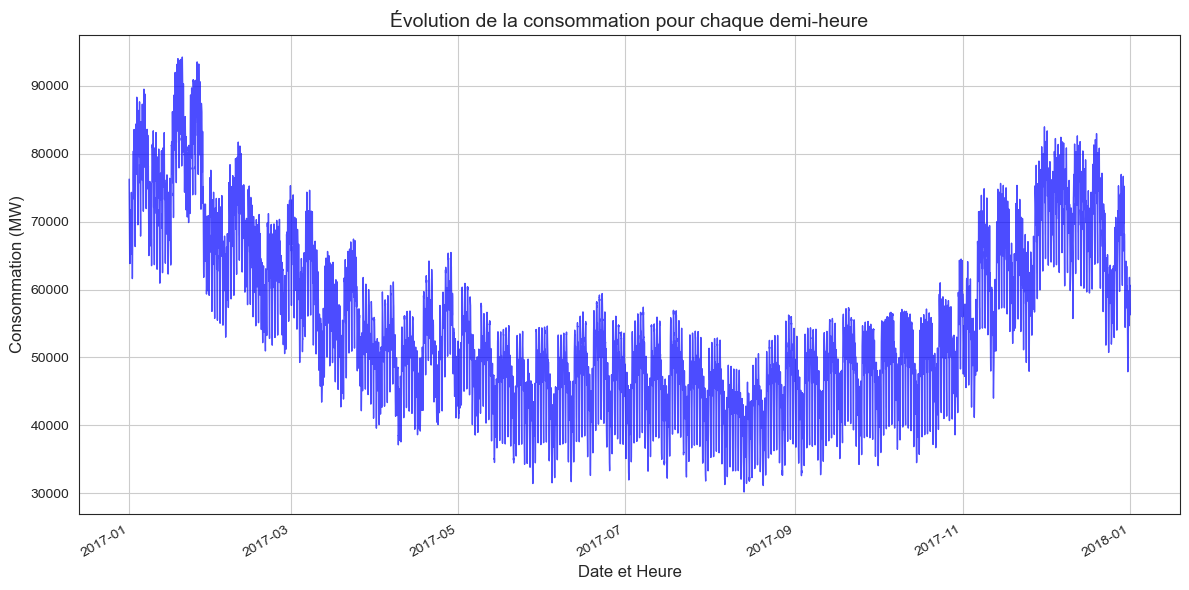

In [135]:
df_copy = df.copy()

# Convertir la colonne 'Date_et_heure' en format datetime
df_copy['Date et Heure'] = pd.to_datetime(df['Date et Heure'])

# Définir la colonne 'Date_et_heure' comme index
df_copy.set_index('Date et Heure', inplace=True)

plt.figure(figsize=(12, 6))
df_copy['Consommation (MW)'].plot(marker='', linestyle='-', linewidth=1, color='b', alpha=0.7) 
plt.title('Évolution de la consommation pour chaque demi-heure', fontsize=14)  
plt.xlabel('Date et Heure', fontsize=12) 
plt.ylabel('Consommation (MW)', fontsize=12)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [136]:
del df_copy

Le graphique suivant présente les fluctuations de la consommation d'énergie au cours de l'année 2017. On observe une diminution progressive de la consommation au début de l'année. Les consommations les plus basses sont enregistrées au milieu de l'année, avant de repartir à la hausse vers la fin de l'année. L'évolution de la consommation au cours de cette année correspond aux différentes saisons. Les consommations les plus faibles sont enregistrées entre la fin du printemps, l'été et le début de l'automne. Elles repartent à la hausse en automne pour atteindre leurs valeurs maximales en hiver. Cela est probablement dû à l'utilisation des chauffages et autres équipements énergivores pendant les périodes de fraîcheur.

### Pour chaque heure de cette année, calculer la proportion de la consommation par rapport à la consommation annuelle

De manière globale, une proportion p s'exprime $ p = n/N $ avec n, l'effectif et N l'effectif total. Pour une heure t de l'année 

In [137]:
# Initialisation des compteurs
i = 0
k = 0

# Initialisation des listes pour stocker les données
Date = []
Heure = []
Date_et_heure = []
Consommation = []

# Boucle pour regrouper les données de consommation par heure
while i < df.shape[0] / 2:  # Supposant que chaque ligne représente une demi-heure
    # Extraction des valeurs pour l'heure actuelle (k) et l'heure suivante (k+1)
    date = df.iloc[k, 0]
    heure = df.iloc[k, 1]
    date_et_heure = df.iloc[k, 2]
    consommation = 0.5*df.iloc[k, 3] + 0.5*df.iloc[k + 1,3]  # Somme de la consommation des deux demi-heures

    # Ajout des valeurs aux listes correspondantes
    Date.append(date)
    Heure.append(heure)
    Date_et_heure.append(date_et_heure)
    Consommation.append(consommation)

    # Incrémentation des compteurs
    k = k + 2  # Pour passer à la prochaine paire d'heures
    i = i + 1  # Pour compter le nombre d'itérations


# Création de DataFrames à partir des listes
dfConsommation = pd.DataFrame(Consommation)
dfHeure = pd.DataFrame(Heure)
dfDate = pd.DataFrame(Date)
dfDate_et_heure = pd.DataFrame(Date_et_heure)

# Concaténation des DataFrames pour former le DataFrame final
frames = [dfDate, dfHeure, dfDate_et_heure, dfConsommation]
df_conso = pd.concat(frames, axis=1)

# Définition des noms de colonnes du DataFrame final
df_conso.columns = ['Date', 'Heure', 'Date_et_heure', 'Consommation']

# Affichage de la taille du DataFrame final
print("Le dataframe df_conso est de taille ", df_conso.shape)

# Affichage des cinq premières lignes du DataFrame final
df_conso.head()


Le dataframe df_conso est de taille  (8759, 4)


,Date,Heure,Date_et_heure,Consommation
0,2017-01-01,00:00,2017-01-01T00:00:00+01:00,75620.0
1,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72797.0
2,2017-01-01,02:00,2017-01-01T02:00:00+01:00,71978.0
3,2017-01-01,03:00,2017-01-01T03:00:00+01:00,68878.5
4,2017-01-01,04:00,2017-01-01T04:00:00+01:00,65907.0


Pour le calcul de la proportion, il faut disposer de l'effection total. 

In [138]:
N = np.sum(df_conso.Consommation) #effectif total
Proportion = []

for i in range(0,df_conso.shape[0]):
    proportion = df_conso.Consommation[i]/N*100
    #var_arr = round(var,4) #limiter à 4 chiffres après la virgule
    Proportion.append(proportion)
    
#len(Proportion)
dfProportion = pd.DataFrame(Proportion)
dfProportion.columns = ['Proportion']
frames = [df_conso,dfProportion]
df_proportion = pd.concat(frames,axis=1)
print("Le dataframe df_proportion est de taille ",df_proportion.shape)
df_proportion.head()

Le dataframe df_proportion est de taille  (8759, 5)


,Date,Heure,Date_et_heure,Consommation,Proportion
0,2017-01-01,00:00,2017-01-01T00:00:00+01:00,75620.0,0.015787
1,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72797.0,0.015198
2,2017-01-01,02:00,2017-01-01T02:00:00+01:00,71978.0,0.015027
3,2017-01-01,03:00,2017-01-01T03:00:00+01:00,68878.5,0.014380
4,2017-01-01,04:00,2017-01-01T04:00:00+01:00,65907.0,0.013759


C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\2874519471.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  Proportion['Date_et_heure'] = pd.to_datetime(Proportion['Date_et_heure'])


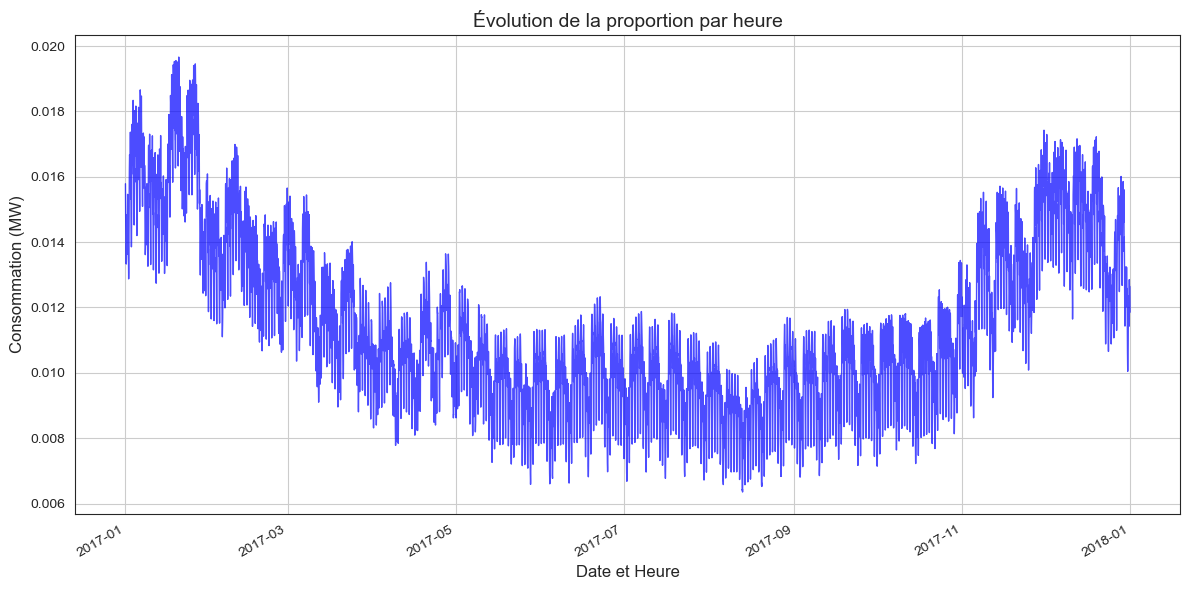

In [139]:
Proportion = df_proportion.copy()

# Convertir la colonne 'Date_et_heure' en format datetime
Proportion['Date_et_heure'] = pd.to_datetime(Proportion['Date_et_heure'])

# Définir la colonne 'Date_et_heure' comme index
Proportion.set_index('Date_et_heure', inplace=True)

plt.figure(figsize=(12, 6))
Proportion['Proportion'].plot(marker='', linestyle='-', linewidth=1, color='b', alpha=0.7) 
plt.title('Évolution de la proportion par heure', fontsize=14)  
plt.xlabel('Date et Heure', fontsize=12) 
plt.ylabel('Consommation (MW)', fontsize=12)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [140]:
del Proportion

Ce graphique montre l'évolution de la proportion de la consommation par rapport à la consommation annuelle. On peut observé qu'elle suit la même tendance que l'évolution de la consommation globale avec les plus faible taux en été. Cela est tout a fait normal, étant donnée qu'il est calculé directement sur la consommation.

## 1.2. Appliquer ce profil à une consommation d’électricité annuelle de 600 TWh, de manière à obtenir pour chaque heure de cette année une consommation (en TWh)

Précédemment, nous avons obtenue la répartition par de la consommation par heure pour 479044647.5 MW. L'objectif ici, sera d'obtenir cette même repartition pour une production annuelle de 600TWh. 

In [141]:
Profil_TWh = []

for i in range(0,df_proportion.shape[0]):
    p = df_proportion.Proportion[i]*6000000
    Profil_TWh.append(p) 

Profil_TWh = pd.DataFrame(Profil_TWh)
Profil_TWh.columns = ['Profil_TWh']
frames = [df_proportion,Profil_TWh]
df_profil = pd.concat(frames,axis=1)
df_profil.head()

,Date,Heure,Date_et_heure,Consommation,Proportion,Profil_TWh
0,2017-01-01,00:00,2017-01-01T00:00:00+01:00,75620.0,0.015787,94723.555966
1,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72797.0,0.015198,91187.393595
2,2017-01-01,02:00,2017-01-01T02:00:00+01:00,71978.0,0.015027,90161.493141
3,2017-01-01,03:00,2017-01-01T03:00:00+01:00,68878.5,0.014380,86278.979762
4,2017-01-01,04:00,2017-01-01T04:00:00+01:00,65907.0,0.013759,82556.802473


C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\497192324.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_profil_copy['Date_et_heure'] = pd.to_datetime(df_profil_copy['Date_et_heure'])


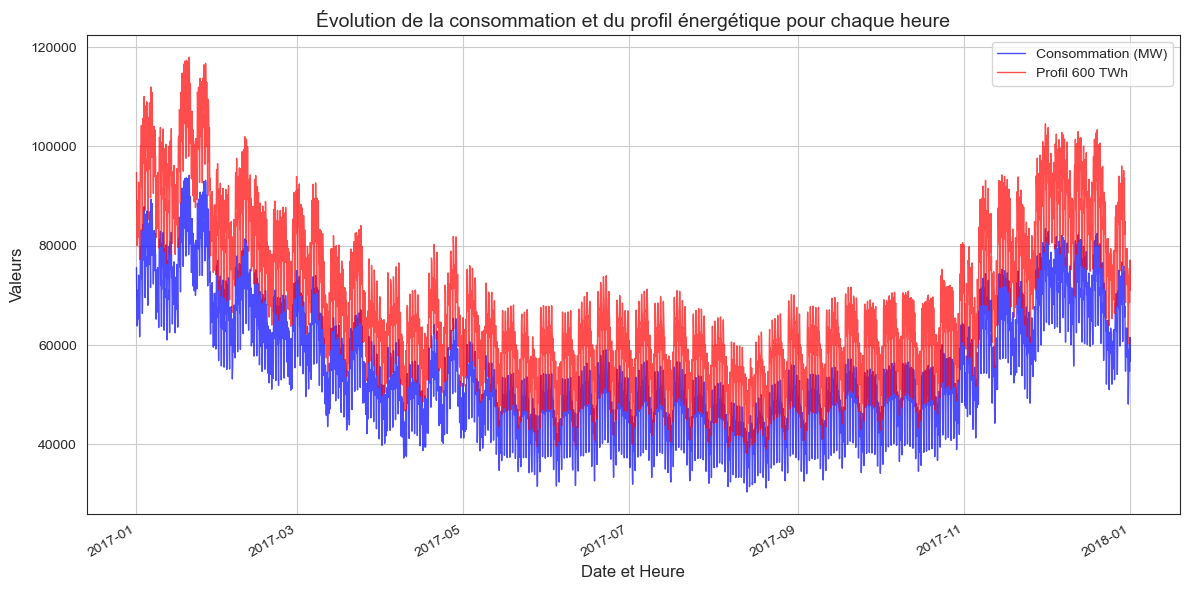

In [142]:
df_profil_copy = df_profil.copy()
df_profil_copy['Date_et_heure'] = pd.to_datetime(df_profil_copy['Date_et_heure'])
df_profil_copy.set_index('Date_et_heure', inplace=True)
plt.figure(figsize=(12, 6))
df_profil_copy['Consommation'].plot(marker='', linestyle='-', linewidth=1, color='b', alpha=0.7, label='Consommation (MW)')
df_profil_copy['Profil_TWh'].plot(marker='', linestyle='-', linewidth=1, color='r', alpha=0.7, label='Profil 600 TWh')
plt.title('Évolution de la consommation et du profil énergétique pour chaque heure', fontsize=14)
plt.xlabel('Date et Heure', fontsize=12)
plt.ylabel('Valeurs', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [143]:
del df_profil_copy

Pour une production de 600 TWh, on peut observer que l'évolution de la consommation de cette nouvelle capacité de production suit le même profil que la production en 2017, avec les plus faibles consommations en été. Les quantités consommées sont plus importantes, mais le profil reste le même. 

## 1.3. Quelles variations de consommation peut-on observer à différentes granularités temporelles (au sein d’une journée, au sein d’une semaine, au sein d’une année) ? Pouvez-vous expliquer ces variations ?


Etant donné que le profil est le même, il y peut d'intérêt à representer les deux (ils suivront la même granularité). Pour plus de lisibilité, nous nous focaliserons uniquement sur le profil à 600 TWh

In [144]:
profil = df_profil.copy()
profil.drop(columns=["Date_et_heure"], inplace=True)

profil['Date'] = pd.to_datetime(profil['Date'])

# Extraire l'année, le mois et le jour dans des colonnes séparées
profil['Année'] = profil['Date'].dt.year
profil['Mois'] = profil['Date'].dt.month
profil['Jour'] = profil['Date'].dt.day

In [145]:
# Group by par mois et calculer la consommation moyenne, puis réinitialiser l'index
consommation_moyenne_par_mois_df = profil.groupby('Mois')['Profil_TWh'].mean().reset_index()

# Group by par heure et calculer la consommation moyenne, puis réinitialiser l'index
consommation_moyenne_par_heure_df = profil.groupby('Heure')['Profil_TWh'].mean().reset_index()

# Group by par jour et calculer la consommation moyenne, puis réinitialiser l'index
consommation_moyenne_par_jour_df = profil.groupby('Jour')['Profil_TWh'].mean().reset_index()

#### Consommation par mois sur l'année 

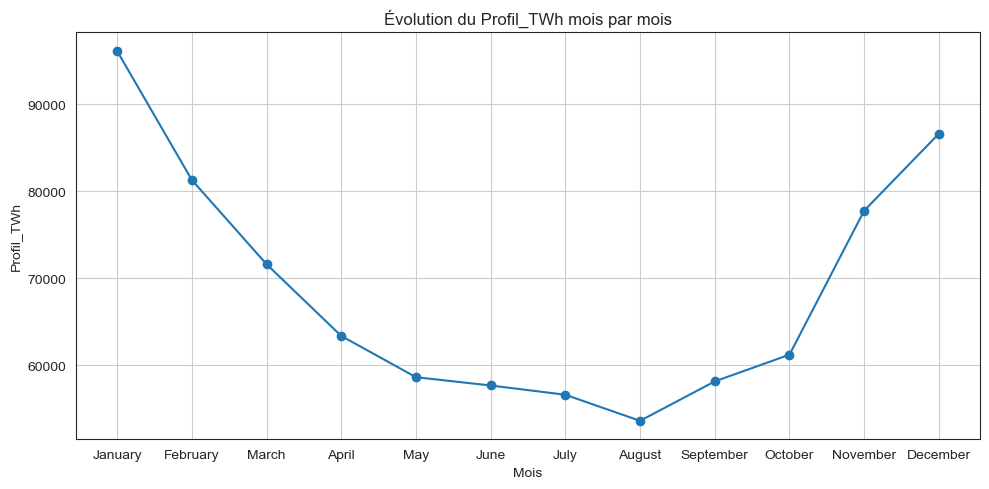

In [146]:
# Créer une série temporelle à partir des données du DataFrame
consommation_moyenne_par_mois_df['Date'] = pd.to_datetime(consommation_moyenne_par_mois_df['Mois'], format='%m')
consommation_moyenne_par_mois_df.set_index('Date', inplace=True)

# Tracer l'évolution mois par mois du Profil_TWh
plt.figure(figsize=(10, 5))
plt.plot(consommation_moyenne_par_mois_df.index.month_name(), consommation_moyenne_par_mois_df['Profil_TWh'], marker='o', linestyle='-')
plt.title("Évolution du Profil_TWh mois par mois")
plt.xlabel("Mois")
plt.ylabel("Profil_TWh")
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [147]:
del consommation_moyenne_par_mois_df

Le graphique suivant confirme la tendance sur l'évolution de la consommation sur l'année 2017 ou les mois d'été sont ceux ou les français consomment le moins. Tout d'abord, les températures estivales plus élevées réduisent considérablement les besoins en chauffage, qui représentent une part importante de la consommation d'énergie des foyers français. Ensuite, les journées étant plus longues en été, les Français peuvent profiter de la lumière naturelle pendant une plus grande partie de la journée, ce qui diminue la nécessité d'utiliser l'éclairage artificiel et contribue à réduire la consommation d'électricité. Par ailleurs, les activités de plein air, les vacances et les loisirs estivaux incitent les gens à passer plus de temps à l'extérieur de leur domicile, ce qui se traduit par une utilisation moindre des appareils électriques intérieurs.

#### Consommation par heure dans une journée 

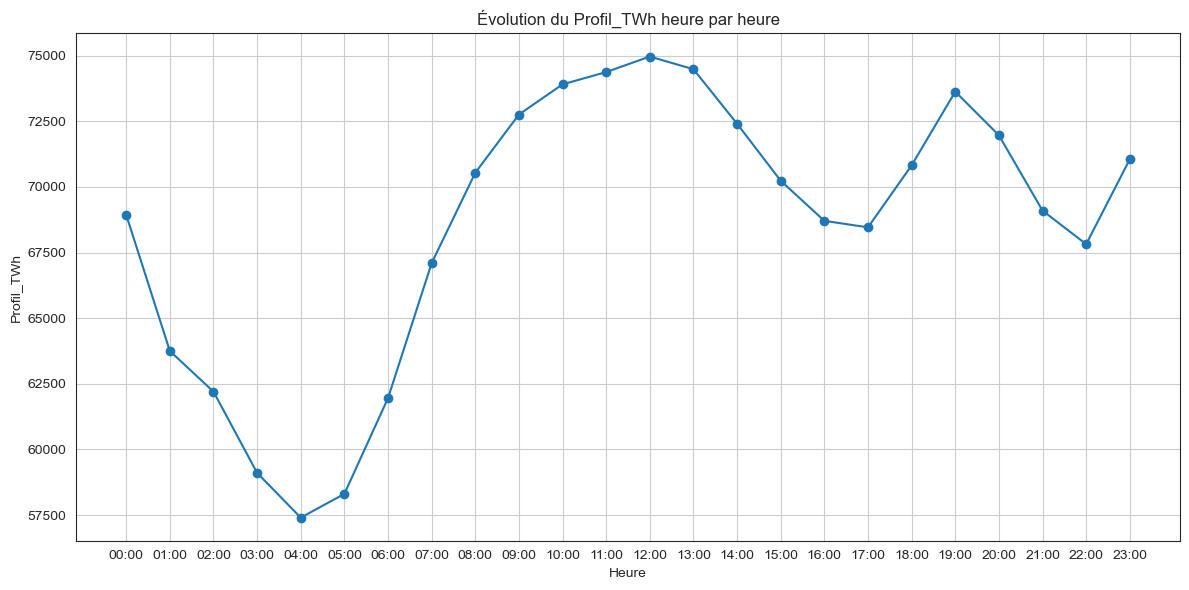

In [148]:
# Définir la colonne 'Heure' comme index
consommation_moyenne_par_heure_df.set_index('Heure', inplace=True)

# Tracer l'évolution de la consommation heure par heure
plt.figure(figsize=(12, 6))
plt.plot(consommation_moyenne_par_heure_df.index, consommation_moyenne_par_heure_df['Profil_TWh'], marker='o', linestyle='-')
plt.title("Évolution du Profil_TWh heure par heure")
plt.xlabel("Heure")
plt.ylabel("Profil_TWh")
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()

Ce graphique montre l'évolution moyenne de la consommation d'électricité à différentes heures de la journée en 2017. En moyenne, sur une journée, on remarque que la consommation la plus basse est à 04:00 et la plus haute à 12:00. En effet, cette évolution suit la même tendance que pourrait avoir un citoyen lambda. On observe une baisse conséquente de la consommation entre 00:00 et 04:00, ce qui pourrait se justifier par le fait que la grande majorité des Français dorment à ces heures. La consommation repart à la hausse à partir de 08:00 (fin de l'heure creuse pour beaucoup de fournisseurs). On observe une nouvelle chute de la consommation au début de l'après-midi, pour atteindre une nouvelle pointe de consommation à 19:00. En résumé, il serait judicieux de penser que l'évolution de la consommation suit les habitudes des Français. Aux heures de repos, la consommation est la plus faible (moins d'équipements allumés). Entre 17:00 et 23:00, on peut observer de grandes variations, correspondant aux heures où les Français passent du temps en famille.

In [149]:
del consommation_moyenne_par_heure_df

#### Consommation par jour dans un mois 

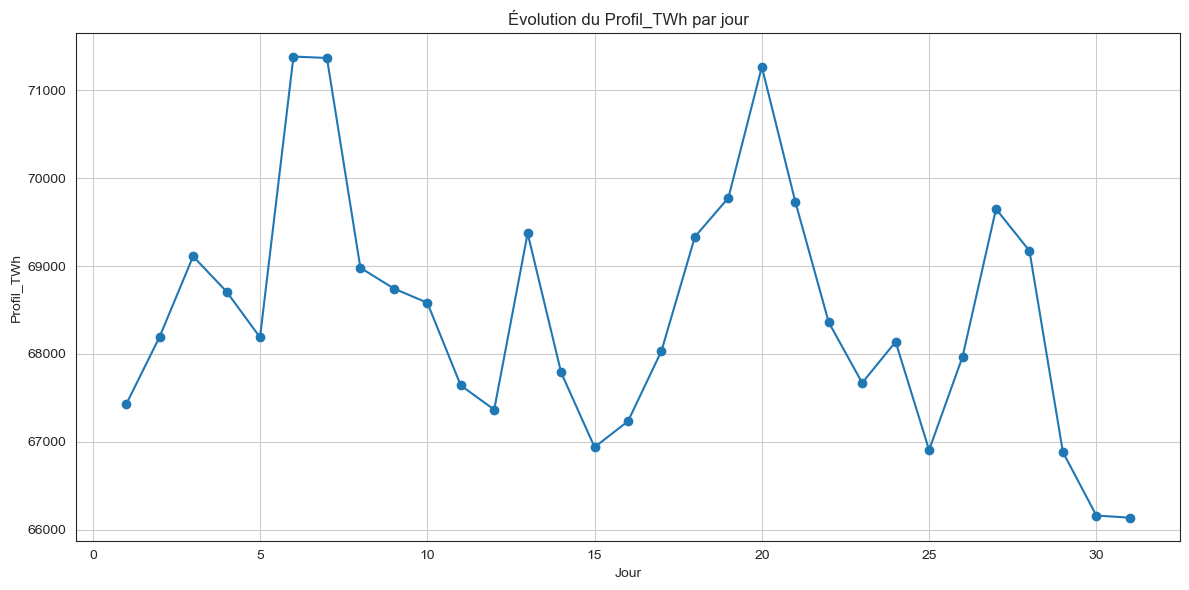

In [150]:
# Définir la colonne 'Jour' comme index
consommation_moyenne_par_jour_df.set_index('Jour', inplace=True)

# Tracer l'évolution de la consommation par jour dans un moi 
plt.figure(figsize=(12, 6))
plt.plot(consommation_moyenne_par_jour_df.index, consommation_moyenne_par_jour_df['Profil_TWh'], marker='o', linestyle='-')
plt.title("Évolution du Profil_TWh par jour")
plt.xlabel("Jour")
plt.ylabel("Profil_TWh")
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()

Ce graphique montre l'évolution moyenne de la consommation d'électricité à différents jours du mois. On n'observe pas de tendance particulière tout au long du mois. Toutefois, on remarque une diminution de la consommation vers la fin du mois. Cela pourrait s'expliquer par le fait que les Français font de plus en plus attention à leur consommation d'électricité afin de réduire leurs factures.

In [151]:
del consommation_moyenne_par_jour_df

# Question 2 : Création de profils de production renouvelable 

Les énergies renouvelables éoliennes et solaires ne sont pas pilotables (cela signigie que la production d'électricité à partir de l'énergie éolienne et solaire ne peut pas être contrôlée ou ajustée en fonction des besoins à tout moment. En d'autres termes, ces sources d'énergie dépendent des conditions naturelles (vent pour l'éolien, ensoleillement pour le solaire) qui ne peuvent pas être manipulées par les opérateurs). 
Afin de déterminer la manière dont ces actifs produisent de l’électricité dans l’année, il est nécessaire de déterminer leur profil de production, qui sera appliqué aux capacités installées dans le mix électrique. 

## Question 2.1.


## Calcul des énergies produites pour chaque heure 

In [152]:
# Sélection des lignes avec l'année 2017 et les colonnes 'Eolienne' et 'Solaire'
renouvelable = mix.loc[mix['Date'].str.contains('2017'), ['Date', 'Heure', 'Date et Heure',  'Consommation (MW)', 'Eolien (MW)', 'Solaire (MW)']]
renouvelable = renouvelable.dropna()
renouvelable.drop_duplicates(subset=['Date et Heure'], inplace=True)
renouvelable = renouvelable.sort_values(by="Date et Heure")
renouvelable.head()

,Date,Heure,Date et Heure,Consommation (MW),Eolien (MW),Solaire (MW)
84711,2017-01-01,00:00,2017-01-01T00:00:00+01:00,76259.0,267.0,-1.0
141066,2017-01-01,00:30,2017-01-01T00:30:00+01:00,74981.0,311.0,-1.0
141067,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72912.0,351.0,-1.0
84713,2017-01-01,01:30,2017-01-01T01:30:00+01:00,72682.0,367.0,-1.0
43466,2017-01-01,02:00,2017-01-01T02:00:00+01:00,72166.0,360.0,-1.0


In [153]:
i = 0
k = 0

Date = []
Heure = []
Date_et_heure = []
Consommation = []
Eolien = []
Solaire = []

while i<renouvelable.shape[0]/2:
    date = renouvelable.iloc[k,0]
    heure = renouvelable.iloc[k,1]
    date_et_heure = renouvelable.iloc[k,2]
    consommation = (renouvelable.iloc[k,3] + renouvelable.iloc[(k+1),3])/2
    eolien = (renouvelable.iloc[k,4] + renouvelable.iloc[(k+1),4])/2 #divisé par 2, moyenne
    solaire = (renouvelable.iloc[k,5] + renouvelable.iloc[(k+1),5])/2 #divisé par 2, moyenne

    Date.append(date)
    Heure.append(heure)
    Date_et_heure.append(date_et_heure)
    Consommation.append(consommation)
    Eolien.append(eolien)
    Solaire.append(solaire)
    
    k = k+2
    i = i+1

dfDate = pd.DataFrame(Date)
dfHeure = pd.DataFrame(Heure)
dfDate_et_heure = pd.DataFrame(Date_et_heure)
dfConsommation = pd.DataFrame(Consommation)
dfEolien = pd.DataFrame(Eolien)
dfSolaire = pd.DataFrame(Solaire)

frames = [dfDate, dfHeure, dfDate_et_heure, dfConsommation, df_proportion.Proportion, df_profil.Profil_TWh, dfEolien,dfSolaire]
df_eolien_solaire = pd.concat(frames, axis = 1)
df_eolien_solaire.columns = ['Date','Heure','Date_et_heure','Consommation','Profil', 'Consommation_600','Eolien','Solaire']
print("Le dataframe eolien_solaire_par_heure est de taille ",df_eolien_solaire.shape)
df_eolien_solaire.head()

Le dataframe eolien_solaire_par_heure est de taille  (8759, 8)


,Date,Heure,Date_et_heure,Consommation,Profil,Consommation_600,Eolien,Solaire
0,2017-01-01,00:00,2017-01-01T00:00:00+01:00,75620.0,0.015787,94723.555966,289.0,-1.0
1,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72797.0,0.015198,91187.393595,359.0,-1.0
2,2017-01-01,02:00,2017-01-01T02:00:00+01:00,71978.0,0.015027,90161.493141,357.0,-1.0
3,2017-01-01,03:00,2017-01-01T03:00:00+01:00,68878.5,0.014380,86278.979762,340.5,-1.0
4,2017-01-01,04:00,2017-01-01T04:00:00+01:00,65907.0,0.013759,82556.802473,384.0,-1.0


In [154]:
df_eolien_solaire_par_jour = df_eolien_solaire.groupby("Date")[["Eolien", "Solaire"]].sum()
df_eolien_solaire_par_jour.head(5)

,Eolien,Solaire
Date,,
2017-01-01,14632.5,7151.5
2017-01-02,15570.5,6712.0
2017-01-03,33277.0,11709.0
2017-01-04,77045.5,10689.0
2017-01-05,51759.0,12406.5


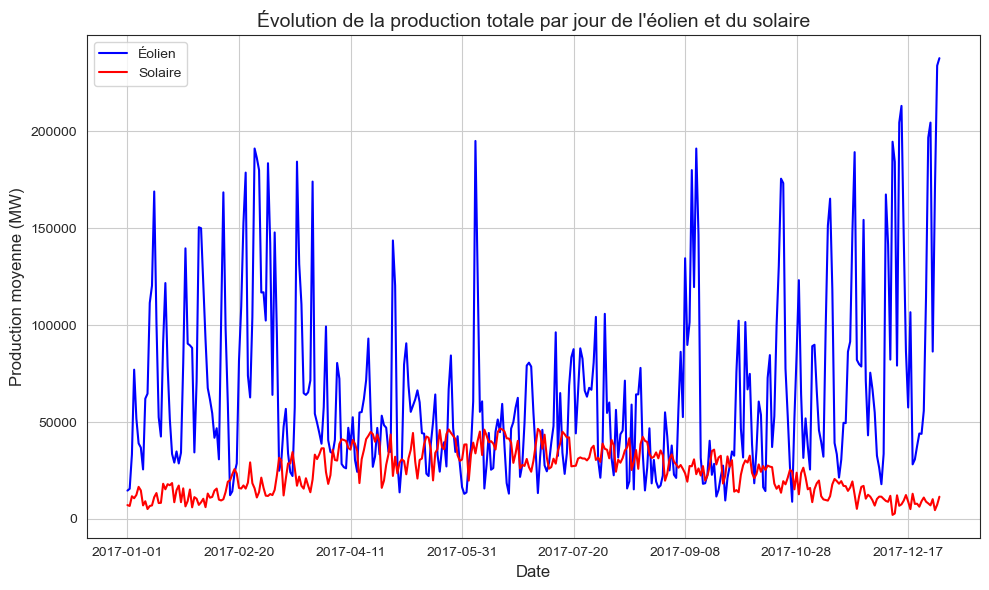

In [155]:
plt.figure(figsize=(15, 4))
# Tracer l'évolution de la production moyenne par jour de l'éolien
df_eolien_solaire_par_jour['Eolien'].plot(linestyle='-', color='b', figsize=(10, 6), label='Éolien')
# Tracer l'évolution de la production moyenne par jour du solaire
df_eolien_solaire_par_jour['Solaire'].plot(linestyle='-', color='r', figsize=(10, 6), label='Solaire')
plt.title('Évolution de la production totale par jour de l\'éolien et du solaire', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Production moyenne (MW)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ce graphique présente la production totale d'électricité par les énergies renouvelables (éolienne et solaire) par jour. 
On peut dores et déjà remarquer que la production d'énergie de source éolienne reste globalement suppérieur à la production d'énergie de source solaire. 

On remarque que les productions les plus élevées par le solaire surviennent également en été, lorsque les températures sont les plus élevées. 

En revanche, la production éolienne atteint des niveaux élevés en hiver. En effet, l'air plus froid et plus dense en hiver accroît la sensation de vent, ce qui entraîne une production accrue d'énergie éolienne pendant les périodes froides.

In [156]:
del df_eolien_solaire_par_jour

## 2.2. Calculer l’énergie maximum pouvant être produite pendant 1 h
Dans la base du parc national annuel, récupérer les puissances installées (colonnes Parc eolien (MW) et Parc solaire (MW)) au 31 décembre 2016.

In [157]:
parc_2016 = parc.loc[parc["Annee"] == 2016, ["Annee", "Parc eolien (MW)", "Parc solaire (MW)"]]
parc_2016.head(5)

,Annee,Parc eolien (MW),Parc solaire (MW)
10,2016,11794.833,6788.445


Les puissances installées au 31 décembre 2016, l'énergie maximum pouvant être produite pendant 1h sont de 11794.833MW pour l'éolien et de 6788.445MW pour le solaire 

## 2.3. Calcul de proportion de production

In [158]:
d = df_eolien_solaire.copy()
Ne = parc_2016['Parc eolien (MW)'] 
Ns = parc_2016['Parc solaire (MW)'] 

Proportion_Eolien = []
Proportion_Solaire = []

for i in range(0,d.shape[0]):
    proportion_eolien = d.Eolien[i]/int(Ne)
    proportion_solaire = d.Solaire[i]/int(Ns)
    Proportion_Eolien.append(proportion_eolien)
    Proportion_Solaire.append(proportion_solaire)

dfProportion_Eolien = pd.DataFrame(Proportion_Eolien)
dfProportion_Solaire = pd.DataFrame(Proportion_Solaire)

frames = [dfProportion_Eolien, dfProportion_Solaire]
dfer = pd.concat(frames, axis=1)
dfer.columns = ['Profil_Eolien','Profil_Solaire'] 

frames = [df_eolien_solaire,dfer]
df_prop_eolien_solaire = pd.concat(frames, axis=1)
df_prop_eolien_solaire.head()

C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\3224454395.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  proportion_eolien = d.Eolien[i]/int(Ne)
C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\3224454395.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  proportion_solaire = d.Solaire[i]/int(Ns)


,Date,Heure,Date_et_heure,Consommation,Profil,Consommation_600,Eolien,Solaire,Profil_Eolien,Profil_Solaire
0,2017-01-01,00:00,2017-01-01T00:00:00+01:00,75620.0,0.015787,94723.555966,289.0,-1.0,0.024504,-0.000147
1,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72797.0,0.015198,91187.393595,359.0,-1.0,0.030439,-0.000147
2,2017-01-01,02:00,2017-01-01T02:00:00+01:00,71978.0,0.015027,90161.493141,357.0,-1.0,0.030270,-0.000147
3,2017-01-01,03:00,2017-01-01T03:00:00+01:00,68878.5,0.014380,86278.979762,340.5,-1.0,0.028871,-0.000147
4,2017-01-01,04:00,2017-01-01T04:00:00+01:00,65907.0,0.013759,82556.802473,384.0,-1.0,0.032559,-0.000147


In [159]:
df_prop_eolien_solaire.loc[[df_prop_eolien_solaire['Profil_Eolien'].idxmax()]]

,Date,Heure,Date_et_heure,Consommation,Profil,Consommation_600,Eolien,Solaire,Profil_Eolien,Profil_Solaire
8724,2017-12-30,13:00,2017-12-30T13:00:00+01:00,63430.0,0.013242,79454.048597,11219.0,1517.0,0.951246,0.223483


On peut remarquer que le jour ou la production d'énergie éolienne a étée la plus grande est le 30 décembre 2O17. Cela corrrespond à un jour d'hiver, ou les vents sont généralement plus fort. 

In [160]:
df_prop_eolien_solaire.loc[[df_prop_eolien_solaire['Profil_Solaire'].idxmax()]]

,Date,Heure,Date_et_heure,Consommation,Profil,Consommation_600,Eolien,Solaire,Profil_Eolien,Profil_Solaire
2629,2017-04-20,14:00,2017-04-20T14:00:00+02:00,59123.0,0.012343,74058.989677,1745.0,5510.0,0.147957,0.811727


La plus forte production d'énergie solaire s'est produite le 20 Avril 2017 à 14H00, mois ou les températures ont été légèrement supérieures à la normale sur le pays. (selon météo contact : https://www.meteocontact.fr/climatologie/france/avril-2017)

C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\3518816255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profil_eol_sol_total['Date'] = pd.to_datetime(profil_eol_sol_total['Date'])


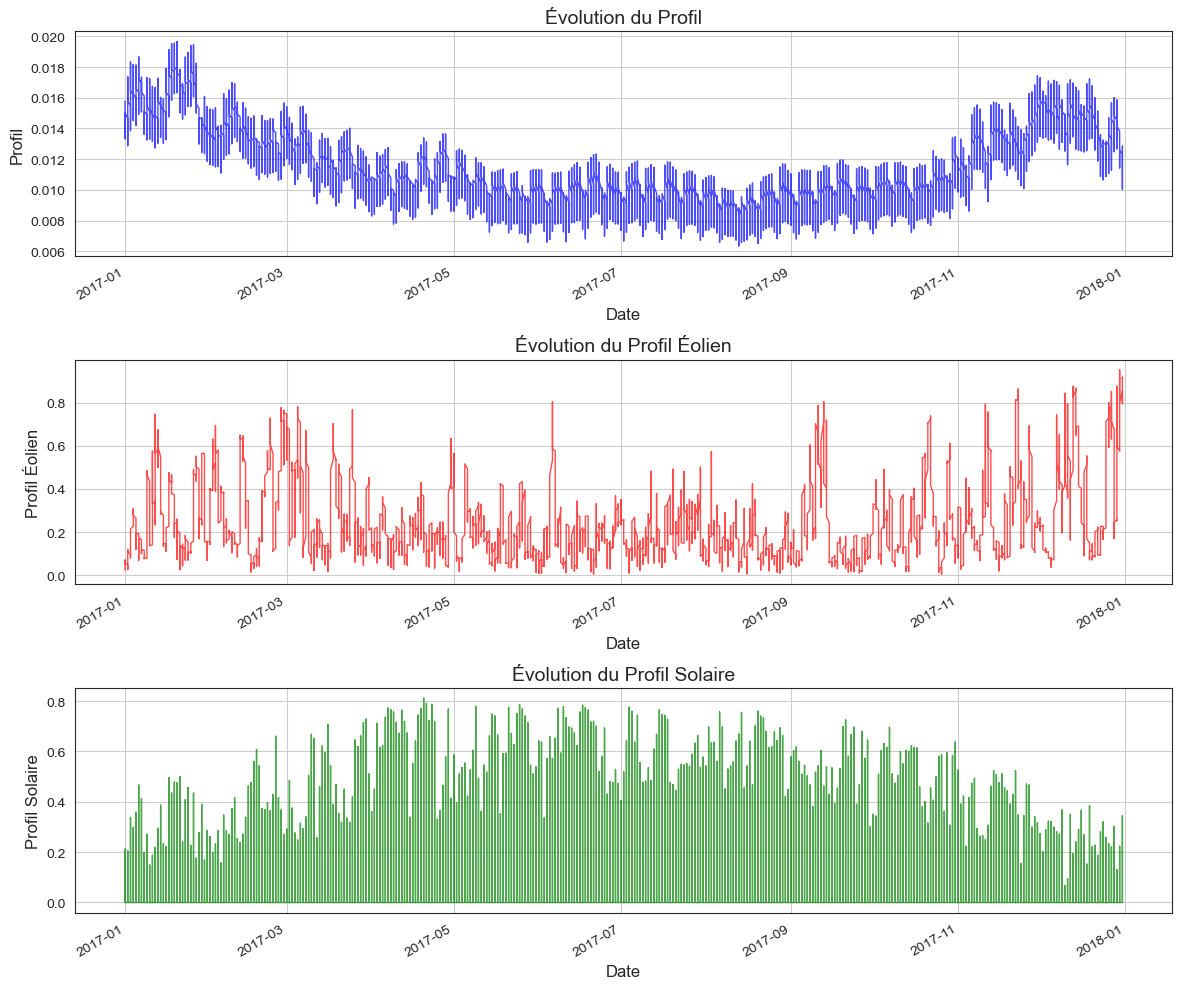

In [161]:
profil_eol_sol_total = df_prop_eolien_solaire[["Date", "Profil", "Profil_Eolien", "Profil_Solaire"]]
profil_eol_sol_total_par_jour = profil_eol_sol_total.groupby("Date")[["Profil", "Profil_Eolien", "Profil_Solaire"]].sum()

# Convertir la colonne 'Date' en format datetime
profil_eol_sol_total['Date'] = pd.to_datetime(profil_eol_sol_total['Date'])

# Définir la colonne 'Date' comme index
profil_eol_sol_total.set_index('Date', inplace=True)

# Créer la figure et les sous-graphiques
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Tracer l'évolution du profil total
profil_eol_sol_total['Profil'].plot(ax=axs[0], marker='', linestyle='-', linewidth=1, color='b', alpha=0.7)
axs[0].set_title('Évolution du Profil', fontsize=14)
axs[0].set_xlabel('Date', fontsize=12)
axs[0].set_ylabel('Profil', fontsize=12)
axs[0].grid(True)

# Tracer l'évolution du profil éolien
profil_eol_sol_total['Profil_Eolien'].plot(ax=axs[1], marker='', linestyle='-', linewidth=1, color='r', alpha=0.7)
axs[1].set_title('Évolution du Profil Éolien', fontsize=14)
axs[1].set_xlabel('Date', fontsize=12)
axs[1].set_ylabel('Profil Éolien', fontsize=12)
axs[1].grid(True)

# Tracer l'évolution du profil solaire
profil_eol_sol_total['Profil_Solaire'].plot(ax=axs[2], marker='', linestyle='-', linewidth=1, color='g', alpha=0.7)
axs[2].set_title('Évolution du Profil Solaire', fontsize=14)
axs[2].set_xlabel('Date', fontsize=12)
axs[2].set_ylabel('Profil Solaire', fontsize=12)
axs[2].grid(True)

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

Les trois graphiques montrent l'évolution des profils de consommation et les profils de production d'énergie renouvelable (éolien et solaire). De l'analyse de ces trois graphiques, on peut observer une nette différence entre l'évolution des profils. Alors que les consommations baissent globalement en été, la production d'énergie via l'éolien ne suit pas de tendance particulière. Elle fluctue énormément. Cela est dû au fait que la présence ou non de vent ne suit pas à priori une tendance bien définie. En ce qui concerne la production d'énergie solaire, on peut observer une augmentation globale de la production au cours des mois d'été (plus chauds). On pourrait penser qu'elle a tendance à être plus importante pendant les périodes où la consommation est plus faible.

In [162]:
df_prop_eolien_solaire.head(5)

,Date,Heure,Date_et_heure,Consommation,Profil,Consommation_600,Eolien,Solaire,Profil_Eolien,Profil_Solaire
0,2017-01-01,00:00,2017-01-01T00:00:00+01:00,75620.0,0.015787,94723.555966,289.0,-1.0,0.024504,-0.000147
1,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72797.0,0.015198,91187.393595,359.0,-1.0,0.030439,-0.000147
2,2017-01-01,02:00,2017-01-01T02:00:00+01:00,71978.0,0.015027,90161.493141,357.0,-1.0,0.030270,-0.000147
3,2017-01-01,03:00,2017-01-01T03:00:00+01:00,68878.5,0.014380,86278.979762,340.5,-1.0,0.028871,-0.000147
4,2017-01-01,04:00,2017-01-01T04:00:00+01:00,65907.0,0.013759,82556.802473,384.0,-1.0,0.032559,-0.000147


## 2.4. Evolution des granularités

In [163]:
granuralite = df_prop_eolien_solaire[["Date", "Heure", "Profil_Eolien", "Profil_Solaire"]]
granuralite['Date'] = pd.to_datetime(granuralite['Date'])
granuralite['Année'] = granuralite['Date'].dt.year
granuralite['Mois'] = granuralite['Date'].dt.month
granuralite['Jour'] = granuralite['Date'].dt.day

C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\228582452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  granuralite['Date'] = pd.to_datetime(granuralite['Date'])
C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\228582452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  granuralite['Année'] = granuralite['Date'].dt.year
C:\Users\Paqua\AppData\Local\Temp\ipykernel_42412\228582452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [164]:
production_moyenne_par_mois_df = granuralite.groupby('Mois')[['Profil_Eolien', 'Profil_Solaire']].mean().reset_index()
production_moyenne_par_heure_df = granuralite.groupby('Heure')[['Profil_Eolien', 'Profil_Solaire']].mean().reset_index()
production_moyenne_par_jour_df = granuralite.groupby('Jour')[['Profil_Eolien', 'Profil_Solaire']].mean().reset_index()

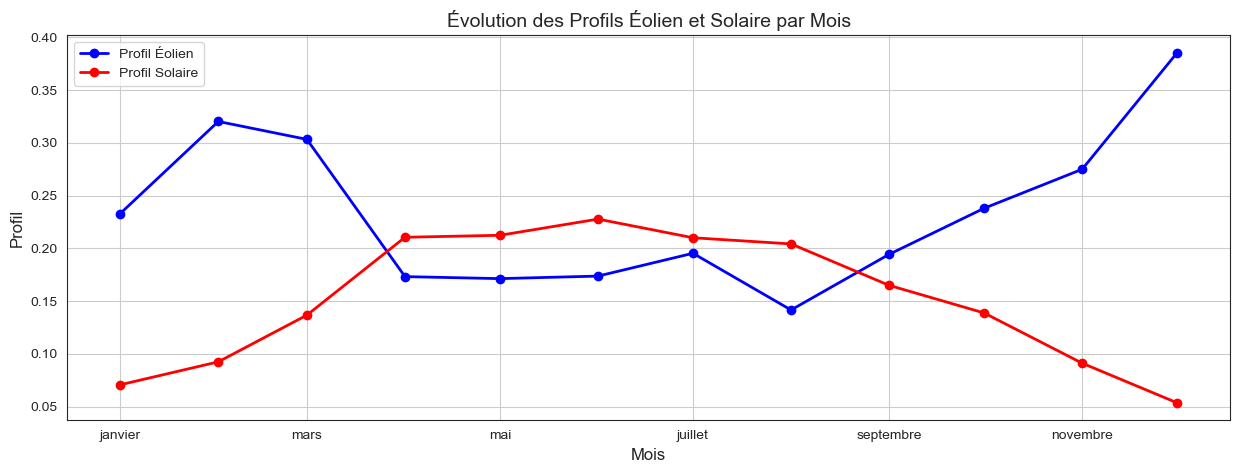

In [165]:
# Convertir les mois numériques en dates pour obtenir les noms des mois
production_moyenne_par_mois_df['Date'] = pd.to_datetime(production_moyenne_par_mois_df['Mois'], format='%m')

# Tracer l'évolution des deux profils par mois
plt.figure(figsize=(15, 5))

plt.plot(production_moyenne_par_mois_df['Date'], production_moyenne_par_mois_df['Profil_Eolien'], marker='o', linestyle='-', linewidth=2, color='b', label='Profil Éolien')
plt.plot(production_moyenne_par_mois_df['Date'], production_moyenne_par_mois_df['Profil_Solaire'], marker='o', linestyle='-', linewidth=2, color='r', label='Profil Solaire')

# Ajouter les titres et les étiquettes
plt.title('Évolution des Profils Éolien et Solaire par Mois', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Profil', fontsize=12)

# Ajouter une grille
plt.grid(True)

# Configurer les étiquettes de l'axe x pour afficher les noms des mois
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%B'))

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

De l'analyse de ce graphique, on peut remarquer que la part la plus importante de la production d'énergie solaire survient dans les mois d'avril, mai, juin, juillet et août, dépassant même la part produite par l'éolien sur cette même période. Cela témoigne donc de l'importance de l'été dans la production d'énergie solaire. Compte tenu des vents froids d'hiver, la production d'énergie éolienne est plus importante en début et en fin d'année.

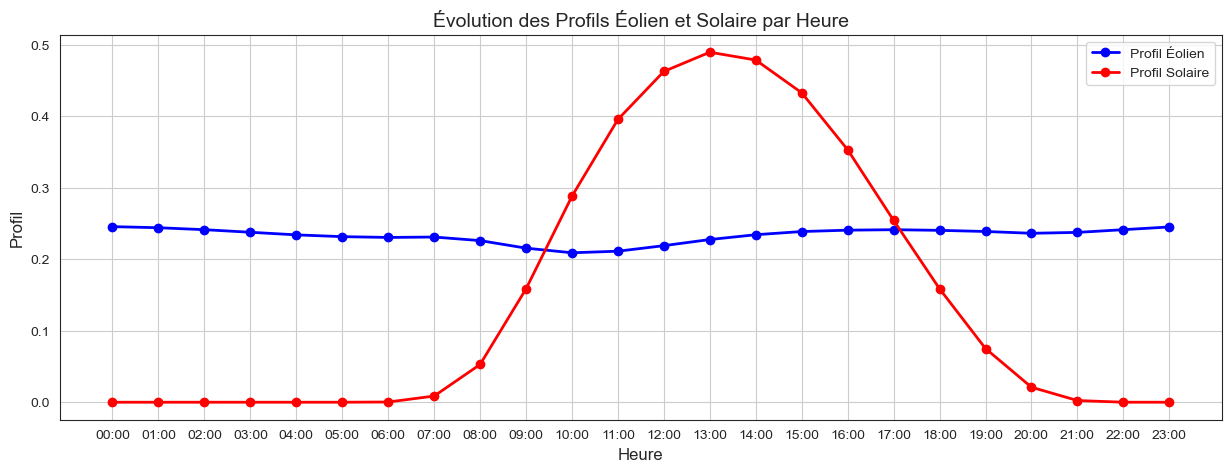

In [166]:
production_moyenne_par_heure_df = granuralite.groupby('Heure')[['Profil_Eolien', 'Profil_Solaire']].mean().reset_index()

# Tracer l'évolution des profils par heure
plt.figure(figsize=(15, 5))

plt.plot(production_moyenne_par_heure_df['Heure'], production_moyenne_par_heure_df['Profil_Eolien'], marker='o', linestyle='-', linewidth=2, color='b', label='Profil Éolien')
plt.plot(production_moyenne_par_heure_df['Heure'], production_moyenne_par_heure_df['Profil_Solaire'], marker='o', linestyle='-', linewidth=2, color='r', label='Profil Solaire')

# Ajouter les titres et les étiquettes
plt.title('Évolution des Profils Éolien et Solaire par Heure', fontsize=14)
plt.xlabel('Heure', fontsize=12)
plt.ylabel('Profil', fontsize=12)

# Ajouter une grille
plt.grid(True)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

Le graphique précédent montre l'évolution moyenne des productions horaires d'énergie solaire et éolienne au cours d'une journée. On peut clairement identifier une distribution normale de la production d'énergie solaire. Elle est très faible en début et en fin de journée, et très forte entre le lever et le coucher du soleil. Cela confirme la tendance naturelle remarquée depuis le début et donc la dépendance totale de cette énergie au soleil. La production d'énergie éolienne, quant à elle, reste constante tout au long de la journée. Cela est notamment dû au fait qu'il n'y ait pas d'heure de la journée où le vent est globalement plus important que les autres heures. 

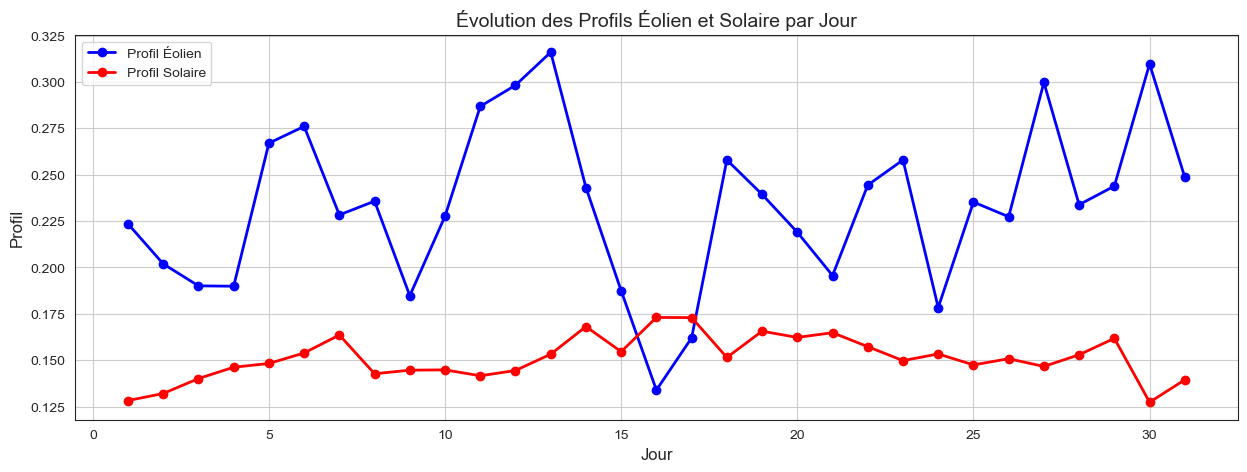

In [167]:
# Tracer l'évolution des profils par jour
plt.figure(figsize=(15, 5))

plt.plot(production_moyenne_par_jour_df['Jour'], production_moyenne_par_jour_df['Profil_Eolien'], marker='o', linestyle='-', linewidth=2, color='b', label='Profil Éolien')
plt.plot(production_moyenne_par_jour_df['Jour'], production_moyenne_par_jour_df['Profil_Solaire'], marker='o', linestyle='-', linewidth=2, color='r', label='Profil Solaire')

# Ajouter les titres et les étiquettes
plt.title('Évolution des Profils Éolien et Solaire par Jour', fontsize=14)
plt.xlabel('Jour', fontsize=12)
plt.ylabel('Profil', fontsize=12)

# Ajouter une grille
plt.grid(True)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

En ce qui concerne l'évolution dans le mois, on ne remarque pas de tendance particulière, à part le fait que la production d'énergie éolienne chute énormément entre le 13 et le 16 du mois. Aucune justification à cette tendance n'a été trouvée.

In [168]:
del granuralite, production_moyenne_par_mois_df, production_moyenne_par_heure_df, production_moyenne_par_jour_df

# Question 3 : Détermination d'un mix électrique optimal 
Afin de constituer le système électrique permettant de servir la consommation prévue en 2050, il faut déterminer les capacités de production (en MW) et la production horaire (en MWh) nécessaires pour satisfaire la demande de chaque heure de l’année au meilleur coût.

Les coûts des différents actifs sont indiqués dans le tableau ci-dessous :    

|        Actif        | Coût d'investissement (€/MW) | Coût opérationnel (€/MWh)   |
|:-------------------:|:-----------------------------:|:--------------------------:|
|       Eolien        |             70000             |              0             |
|       Solaire       |             50000             |              0             |
|     Turbine H2      |             60000             |            150             |
|      Déléstage      |               0               |            3000            |
| Excès de production|               0                |            1000            |

## Modéliser le problème sous forme d’un programme linéaire

L’objectif de ce programme linéaire est de minimiser la somme des coûts d’investissement et des coûts opérationnels du système. 

La consommation de chaque heure de la journée doit être satisfaite dans la mesure du possible par la production des différents actifs. L’équation doit également tenir compte des délestages ou des excès de production éventuels.

La production horaire de chaque actif ne peut pas dépasser sa production horaire maximum. Pour les actifs éoliens et solaires, la production horaire est fixée par le produit entre la production horaire maximum et le profil déterminé dans la question 2.

Soit :

- $c_1$ : la capacité installé pour l'actif éolien 
- $c_2$ : la capacité installé pour l'actif solaire
- $c_3$ : la capacité installé pour l'actif turbine H2
- $p_3$ : coût opérationnel de la production horaire de l'actif turbine H2
- $d$   : délestage*
- $e$   : Excès de production 
- $profil_1$ : proportion de l'actif éolien 
- $profil_2$ : proportion de l'actif solaire 


Selon engie, on appelle le délestage électrique l’action de suspendre temporairement la fourniture d’énergie pour une partie des utilisateurs (professionnels ou particuliers) dans une zone géographique précise. Il peut également s’agir de couper l’alimentation électrique d’un certain nombre d’appareils au sein d’une maison.

On cherchera donc à minimiser les capacités à installer pour les trois actifs (écolien, solaire, turbine) ainsi que la cout opérationnels. Les délestages et excès de production devront également être minimiser. 

In [169]:
df_2050 = df_prop_eolien_solaire.copy()
df_2050.shape

(8759, 10)

In [170]:
df_2050.head(5)

,Date,Heure,Date_et_heure,Consommation,Profil,Consommation_600,Eolien,Solaire,Profil_Eolien,Profil_Solaire
0,2017-01-01,00:00,2017-01-01T00:00:00+01:00,75620.0,0.015787,94723.555966,289.0,-1.0,0.024504,-0.000147
1,2017-01-01,01:00,2017-01-01T01:00:00+01:00,72797.0,0.015198,91187.393595,359.0,-1.0,0.030439,-0.000147
2,2017-01-01,02:00,2017-01-01T02:00:00+01:00,71978.0,0.015027,90161.493141,357.0,-1.0,0.030270,-0.000147
3,2017-01-01,03:00,2017-01-01T03:00:00+01:00,68878.5,0.014380,86278.979762,340.5,-1.0,0.028871,-0.000147
4,2017-01-01,04:00,2017-01-01T04:00:00+01:00,65907.0,0.013759,82556.802473,384.0,-1.0,0.032559,-0.000147


Le problème s'écrit : 

$$
(P):
\left \{
\begin{array}{r c l}
Min \: Z = 70000c_1 +50000c_2+60000c_3 + 150\sum_{i=1}^{8759} p_3[i] + 3000\sum_{i=1}^{8759} d[i] + 1000\sum_{i=1}^{8759} e[i]\cr
       c_1*profil_1[i] + c_2*profil_2[i] + p_3[i] + d[i] - e[i] == c_{600}[i]\cr
       p_3[i]≤c_3\cr
       c_i≥0 \: ∀ i∈\{1,...,8759\} \cr
\end{array}
\right .
$$

In [171]:
import pulp 

problem = pulp.LpProblem("Problème mix énergétique", pulp.LpMinimize)

#Création des variables
c_1 = pulp.LpVariable('capacité éolien', lowBound=0, cat='Continuous')
c_2 = pulp.LpVariable('capacité solaire', lowBound=0, cat='Continuous')
c_3 = pulp.LpVariable('capacité turbine h2', lowBound=0, cat='Continuous')

nb_heures = len(df_2050)
p_3 = [pulp.LpVariable(f"production turbine à l'heure {i}", lowBound=0, cat='Continuous') for i in range(nb_heures)]
d = [pulp.LpVariable(f"délestage à l'heure {i}", lowBound=0, cat='Continuous') for i in range(nb_heures)]
e = [pulp.LpVariable(f"excédent à l'heure {i}", lowBound=0, cat='Continuous') for i in range(nb_heures)]

# Fontion Objective
problem += 70000*c_1 + 50000*c_2 + 60000*c_3 + 150*sum(p_3) + 3000*sum(d) + 1000*sum(e), "Z"

# Contraintes
for i in range(len(df_2050)):
    problem += p_3[i] <= c_3
    problem += c_1*df_2050['Profil_Eolien'].iloc[i] + c_2*df_2050['Profil_Solaire'].iloc[i] + p_3[i] + d[i] -e[i] == df_2050['Consommation_600'].iloc[i]

# Création du fichier .lp 
problem.writeLP("problem_normal.lp")

#Résolution du problème
problem.solve()

# Affichage du statut du problème
pulp.LpStatus[problem.status]
    
# Affichage de la valeur de c_1, c_2, c_3 et de la fonction objective
print("La valeur de c_1 est :", c_1.varValue, "MW")
print("La valeur de c_2 est :",c_2.varValue, "MW")
print("La valeur de c_3 est :",c_3.varValue, "MW")
print("La valeur de la fonction objective Z est : ",pulp.value(problem.objective), "MW")

heures_delestage = 0
volume_delestage = 0
for variable in problem.variables():
    if ("délestage" in variable.name) & (variable.varValue != 0):
        heures_delestage+=1
        volume_delestage+=variable.varValue
        
print("Le nombre d'heures de délestages est égal à : %d" %heures_delestage)
print("La quantité totale de délestage est égale à : %.3f MW" %volume_delestage)
        
heures_excedent = 0
volume_excedent = 0
for variable in problem.variables():
    if ("excédent" in variable.name) & (variable.varValue != 0):
        heures_excedent+=1
        volume_excedent+=variable.varValue
        
print("Le nombre d'heures d'excès de production est égal à : %d" %heures_excedent)
print("La quantité totale d'excès de production est égale à : %.3f MW" %volume_excedent)

c:\Users\Paqua\anaconda3\Lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


La valeur de c_1 est : 88866.385 MW
La valeur de c_2 est : 56439.435 MW
La valeur de c_3 est : 96257.888 MW
La valeur de la fonction objective Z est :  70817865833.97478 MW
Le nombre d'heures de délestages est égal à : 21
La quantité totale de délestage est égale à : 84994.845 MW
Le nombre d'heures d'excès de production est égal à : 371
La quantité totale d'excès de production est égale à : 3656594.439 MW


*Composition du mix electrique pour 600TWh*
- Eolien : 88866.385 MW
- Solaire : 56439.435 MW
- Turbine H2 : 96257.888 MW
- Délestage : 21h pour 84994.845 MW
- Excès de production : 371h pour 3656594.439 MW

# Question 4 - Simulation de l’adéquation du mix électrique
Le mix électrique calculé dans la question 3 est adapté à une consommation annuelle de 600 TWh. Cependant, il existe une incertitude importante sur ces projections de demande à long terme, et particulièrement dans le cadre de la transition énergétique. En effet, il est difficile d’évaluer quels vecteurs énergétiques et quelles technologies émergeront pour satisfaire les différents usages à cet horizon.

Dans la première simulation (consommation = 500 TWh), le programme linéaire aura la forme suivante :

$$
(P1):
\left \{
\begin{array}{r c l}
Min \: Z = 70000 c1_{500} +50000 c2_{500}+60000 c3_{500} + 150\sum_{i=1}^{8759} p_3[i] + 3000\sum_{i=1}^{8759} d[i] + 1000\sum_{i=1}^{8759} e[i]\cr
       c1_{500} *profil_1[i] + c2_{500} *profil_2[i] + p_3[i] + d[i] = c_{500}[i]+e[i]\cr
       p_3[i]≤ c3_{500}\cr
       ci_{500} ≥0 \: ∀ i∈\{1,...,8759\} \cr
\end{array}
\right .
$$

Dans la deuxième simulation (consommation = 700 TWh), le programme linéaire aura la forme suivante :

$$
(P2):
\left \{
\begin{array}{r c l}
Min \: Z = 70000 c1_{700} +50000 c2_{700} +60000 c3_{700} + 150\sum_{i=1}^{8759} p_3[i] + 3000\sum_{i=1}^{8759} d[i] + 1000\sum_{i=1}^{8759} e[i]\cr
       c1_{700} * profil_1[i] + c2_{700} * profil_2[i] + p_3[i] + d[i] = c_{700}[i]+e[i]\cr
       p_3[i] ≤ c3_{700}\cr
       ci_{700} ≥0 \: ∀ i∈\{1,...,8759\} \cr
\end{array}
\right .
$$

In [172]:
Consommation_500 = []
Consommation_700 = []

for i in range(0,df_2050.shape[0]):
    p1 = df_2050.Profil[i]*5000000
    Consommation_500.append(p1)
    
    p2 = df_2050.Profil[i]*7000000
    Consommation_700.append(p2)

dfConsommation_500 = pd.DataFrame(Consommation_500)
dfConsommation_700 = pd.DataFrame(Consommation_700)
dfConsommation_500.columns = ['Consommation_500']
dfConsommation_700.columns = ['Consommation_700']

frames = [df_2050,dfConsommation_500,dfConsommation_700]
df_2050_bis = pd.concat(frames,axis=1)
print("Le dataframe df_profil est de taille ",df_2050_bis.shape)

Le dataframe df_profil est de taille  (8759, 12)


In [173]:
df_2050 = df_2050_bis

## Simulation 1 : Consommation annuelle = 500 TWh

In [174]:
problem_5 = pulp.LpProblem("Problème mix énergétique (Consommation = 500 TWh) et nouvelles valeurs de c_1, c_2 et c_3",pulp.LpMinimize)

#Création des variables
c_1_n = c_1.varValue
c_2_n = c_2.varValue
c_3_n = c_3.varValue

nb_heures = len(df_2050)

p_3 = [pulp.LpVariable(f"production ccgt à l'heure {i}", lowBound=0, cat='Continuous') for i in range(nb_heures)]
d = [pulp.LpVariable(f"délestage à l'heure {i}", lowBound=0, cat='Continuous') for i in range(nb_heures)]
e = [pulp.LpVariable(f"excédent à l'heure {i}", lowBound=0, cat='Continuous') for i in range(nb_heures)]

# Fontion Objective
problem_5 += 70000 * c_1_n + 50000 * c_2_n + 60000 * c_3_n + 150 * sum(p_3) + 3000 * sum(d) + 1000 * sum(e), "Z"

# Contraintes
for i in range(len(df_2050)):
    problem_5 += p_3[i] <= c_3_n
    problem_5 += c_1_n*df_2050['Profil_Eolien'].iloc[i] + c_2_n*df_2050['Profil_Solaire'].iloc[i] + p_3[i] + d[i] == df_2050['Consommation_500'].iloc[i] + e[i]

    
# Création du fichier .lp
problem_5.writeLP("problem5_normal.lp")

#Résolution du problème
problem_5.solve()

# Affichage du statut du problème
print("Le statut du problème est : ",pulp.LpStatus[problem_5.status])

#Affichage des valeurs variables
#for variable in problem.variables():
    #print(f"{variable.name} = {variable.varValue}")
    
# Affichage de la valeur de c_1, c_2, c_3 et de la fonction objective
print("La nouvelle valeur de c_1_n est : ", c_1.varValue,"MW")
print("La nouvelle valeur de c_2_n est : ",c_2.varValue,"MW")
print("La nouvelle valeur de c_3_n est : ",c_3.varValue,"MW")
print("La valeur de la fonction objective est : ",pulp.value(problem_5.objective),"MW")

heures_delestage = 0
volume_delestage = 0
for variable in problem_5.variables():
    if ("délestage" in variable.name) & (variable.varValue != 0):
        heures_delestage+=1
        volume_delestage+=variable.varValue
        
print("Le nombre d'heures de délestage est égal à : %d" %heures_delestage)
print("La quantité totale de délestage est égale à : %.3f MW" %volume_delestage)
        
heures_excedent = 0
volume_excedent = 0
for variable in problem_5.variables():
    if ("excédent" in variable.name) & (variable.varValue != 0):
        heures_excedent+=1
        volume_excedent+=variable.varValue
        
print("Le nombre d'heures d'excès de production est égal à : %d" %heures_excedent)
print("La quantité totale d'excès de production est égale à : %.3f MW" %volume_excedent)

c:\Users\Paqua\anaconda3\Lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Le statut du problème est :  Optimal
La nouvelle valeur de c_1_n est :  88866.385 MW
La nouvelle valeur de c_2_n est :  56439.435 MW
La nouvelle valeur de c_3_n est :  96257.888 MW
La valeur de la fonction objective est :  62273303460.951614 MW
Le nombre d'heures de délestage est égal à : 0
La quantité totale de délestage est égale à : 0.000 MW
Le nombre d'heures d'excès de production est égal à : 845
La quantité totale d'excès de production est égale à : 9480657.927 MW


*Composition du mix electrique pour 500TWh*
- Eolien : 88866.385 MW
- Solaire : 56439.435 MW
- Turbine H2 : 96257.888 MW
- Délestage : 0h pour 0.000 MW
- Excès de production : 845h pour 9480657.927 MW

## Simulation 2 : Consommation annuelle = 700 TWh

In [175]:
problem_3 = pulp.LpProblem("Problème mix énergétique hypothèse 3 (Consommation =700 TWh)",pulp.LpMinimize)

#Création des variables
c_1_700 = c_1.varValue
c_2_700 = c_2.varValue
c_3_700 = c_3.varValue

nb_heures = len(df_2050)

p_3_hyp3 = [pulp.LpVariable(f"production ccgt à l'heure {i} hypothèse 3", lowBound=0, cat='Continuous') for i in range(nb_heures)]
d_hyp3 = [pulp.LpVariable(f"délestage à l'heure {i} hypothèse 3", lowBound=0, cat='Continuous') for i in range(nb_heures)]
e_hyp3 = [pulp.LpVariable(f"excédent à l'heure {i} hypothèse 3", lowBound=0, cat='Continuous') for i in range(nb_heures)]

# Fontion Objective
problem_3 += 70000 * c_1_700 + 50000 * c_2_700 + 60000 * c_3_700 + 150 * sum(p_3_hyp3) + 3000 * sum(d_hyp3) + 1000 * sum(e_hyp3), "Z"

# Contraintes
for i in range(len(df_2050)):
    problem_3 += p_3_hyp3[i] <= c_3_700
    problem_3 += c_1_700*df_2050['Profil_Eolien'].iloc[i] + c_2_700*df_2050['Profil_Solaire'].iloc[i] + p_3_hyp3[i] + d_hyp3[i] == df_2050['Consommation_700'].iloc[i] + e_hyp3[i]
   
 # Création du fichier .lp
problem_3.writeLP("problem3_normal.lp")

#Résolution du problème
problem_3.solve()

# Affichage du statut du problème
print("Le statut du problème est : ",pulp.LpStatus[problem_3.status])

#Affichage des valeurs variables
#for variable in problem_3.variables():
    #print(f"{variable.name} = {variable.varValue}")
    
# Affichage de la valeur de c_1_700, c_2_700, c_3_700 et de la fonction objective
print("La valeur de c_1_700 est : ", c_1.varValue,"MW")
print("La valeur de c_2_700 est : ",c_2.varValue,"MW")
print("La valeur de c_3_700 est : ",c_3.varValue,"MW")
print("La valeur de la fonction objective Z est :",pulp.value(problem_3.objective),"MW")

heures_delestage = 0
volume_delestage = 0
for variable in problem_3.variables():
    if ("délestage" in variable.name) & (variable.varValue != 0):
        heures_delestage+=1
        volume_delestage+=variable.varValue
        
print("Le nombre d'heures de délestage est égal à : %d" %heures_delestage)
print("La quantité totale de délestage est égale à : %.3f MW" %volume_delestage)
        
heures_excedent = 0
volume_excedent = 0
for variable in problem_3.variables():
    if ("excédent" in variable.name) & (variable.varValue != 0):
        heures_excedent+=1
        volume_excedent+=variable.varValue
        
print("Le nombre d'heures d'excès de production est égal à : %d" %heures_excedent)
print("La quantité totale d'excès de production est égale à : %.3f MW" %volume_excedent)

Le statut du problème est :  Optimal
La valeur de c_1_700 est :  88866.385 MW
La valeur de c_2_700 est :  56439.435 MW
La valeur de c_3_700 est :  96257.888 MW
La valeur de la fonction objective Z est : 90254179421.78181 MW
Le nombre d'heures de délestage est égal à : 370
La quantité totale de délestage est égale à : 2680510.392 MW
Le nombre d'heures d'excès de production est égal à : 153
La quantité totale d'excès de production est égale à : 1081893.882 MW


*Composition du mix electrique pour 700TWh*
- Eolien : 88866.385 MW
- Solaire : 56439.435 MW
- Turbine H2 : 96257.888 MW
- Délestage : 370h pour 2680510.392 MW
- Excès de production : 153h pour 1081893.882 MW

In [178]:
data = {"600TWh": {"éolien": 88866.385, "solaire": 56439.435, "turbine h2": 96257.888, "heure delestage":21, "Heure excès":371},
        "500TWh": {"éolien": 88866.385, "solaire": 56439.435, "turbine h2": 96257.888, "heure delestage":0, "Heure excès":845},
        "700TWh": {"éolien": 88866.385, "solaire": 56439.435, "turbine h2": 96257.888, "heure delestage":370, "Heure excès":153}}

# Convertir le dictionnaire en DataFrame
df = pd.DataFrame(data).T
df.head(5)

,éolien,solaire,turbine h2,heure delestage,Heure excès
600TWh,88866.385,56439.435,96257.888,21.0,371.0
500TWh,88866.385,56439.435,96257.888,0.0,845.0
700TWh,88866.385,56439.435,96257.888,370.0,153.0


Le tableau précédent résume les résultats obtenus à partir des problèmes d'optimisation. On peut remarquer de grandes variations dans les délestages. En effet, ils augmentent avec l'augmentation de la quantité à produire. Pour une production de 500 TWh, il n'y a pas de délestage (0 h) avec un très grand excès d'heures de production. On compte 21 h de délestage pour la production de 600 TWh et 370 h pour la production de 700 TWh. Le mix électrique tel qu'il est actuellement considéré ne permettra pas de répondre aux besoins d'ici 2050. Il faudra donc prendre en compte des sources d'énergie pilotables et renouvelables afin d'atteindre la neutralité carbone de manière efficace (sans délestage)

# Question 5 – Prise en compte de plusieurs scénarios 

$$
\begin{align}
& \min Z = 70000c_1 + 50000c_2 + 60000c_3 + \frac{1}{3} \left( 150\sum_{i=1}^{8759} p3_{500}[i] + 3000\sum_{i=1}^{8759} d_{500}[i] + 1000\sum_{i=1}^{8759} e_{500}[i] \right) + \\
& \quad \frac{1}{3} \left( 150\sum_{i=1}^{8759} p3_{600}[i] + 3000\sum_{i=1}^{8759} d_{600}[i] + 1000\sum_{i=1}^{8759} e_{600}[i] \right) + \\
& \quad \frac{1}{3} \left( 150\sum_{i=1}^{8759} p3_{700}[i] + 3000\sum_{i=1}^{8759} d_{700}[i] + 1000\sum_{i=1}^{8759} e_{700}[i] \right) \\
& \text{s.t.} \\
& \quad c_1 \cdot \text{profil}_1[i] + c_2 \cdot \text{profil}_2[i] + p3_{500}[i] + d_{500}[i] = c_{500}[i] + e_{500}[i], \quad \forall i \in \{1, \ldots, 8759\} \\
& \quad c_1 \cdot \text{profil}_1[i] + c_2 \cdot \text{profil}_2[i] + p3_{600}[i] + d_{600}[i] = c_{600}[i] + e_{600}[i], \quad \forall i \in \{1, \ldots, 8759\} \\
& \quad c_1 \cdot \text{profil}_1[i] + c_2 \cdot \text{profil}_2[i] + p3_{700}[i] + d_{700}[i] = c_{700}[i] + e_{700}[i], \quad \forall i \in \{1, \ldots, 8759\} \\
& \quad p3_{500}[i] \leq c_3, \quad \forall i \in \{1, \ldots, 8759\} \\
& \quad p3_{600}[i] \leq c_3, \quad \forall i \in \{1, \ldots, 8759\} \\
& \quad p3_{700}[i] \leq c_3, \quad \forall i \in \{1, \ldots, 8759\} \\
& \quad c_i \geq 0, \quad \forall i \in \{1, \ldots, 8759\}
\end{align}
$$


In [176]:
problem_4 = pulp.LpProblem("Problème mix énergétique hypothèse 4 (prise en compte de plusieurs scenarios)",pulp.LpMinimize)

#Création des variables
c_1 = pulp.LpVariable('capacité éolien', lowBound=0, cat='Continuous')
c_2 = pulp.LpVariable('capacité solaire', lowBound=0, cat='Continuous')
c_3 = pulp.LpVariable('capacité ccgt', lowBound=0, cat='Continuous')


nb_heures = len(df_2050)

p_3_500 = [pulp.LpVariable(f"production ccgt à l'heure {i} hypothèse 1", lowBound=0, cat='Continuous') for i in range(nb_heures)]
d_500 = [pulp.LpVariable(f"délestage à l'heure {i} hypothèse 1", lowBound=0, cat='Continuous') for i in range(nb_heures)]
e_500 = [pulp.LpVariable(f"excédent à l'heure {i} hypothèse 1", lowBound=0, cat='Continuous') for i in range(nb_heures)]

p_3_600 = [pulp.LpVariable(f"production ccgt à l'heure {i} hypothèse 2", lowBound=0, cat='Continuous') for i in range(nb_heures)]
d_600 = [pulp.LpVariable(f"délestage à l'heure {i} hypothèse 2", lowBound=0, cat='Continuous') for i in range(nb_heures)]
e_600 = [pulp.LpVariable(f"excédent à l'heure {i} hypothèse 2", lowBound=0, cat='Continuous') for i in range(nb_heures)]

p_3_700 = [pulp.LpVariable(f"production ccgt à l'heure {i} hypothèse 3", lowBound=0, cat='Continuous') for i in range(nb_heures)]
d_700 = [pulp.LpVariable(f"délestage à l'heure {i} hypothèse 3", lowBound=0, cat='Continuous') for i in range(nb_heures)]
e_700 = [pulp.LpVariable(f"excédent à l'heure {i} hypothèse 3", lowBound=0, cat='Continuous') for i in range(nb_heures)]

# Fontion Objective
problem_4 += 70000 * c_1 + 50000 * c_2 + 60000 * c_3 + 1/3*(150 * sum(p_3_500) + 3000 * sum(d_500) + 1000 * sum(e_500)) + 1/3*(150 * sum(p_3_600) + 3000 * sum(d_600) + 1000 * sum(e_600)) + 1/3*(150 * sum(p_3_700) + 3000 * sum(d_700) + 1000 * sum(e_700)), "Z"

# Contraintes
for i in range(len(df_2050)):
    problem_4 += p_3_500[i] <= c_3
    problem_4 += p_3_600[i] <= c_3
    problem_4 += p_3_700[i] <= c_3

    problem_4 += c_1*df_2050['Profil_Eolien'].iloc[i] + c_2*df_2050['Profil_Solaire'].iloc[i] + p_3_500[i] + d_500[i] == df_2050['Consommation_500'].iloc[i] + e_500[i]
    problem_4 += c_1*df_2050['Profil_Eolien'].iloc[i] + c_2*df_2050['Profil_Solaire'].iloc[i] + p_3_600[i] + d_600[i] == df_2050['Consommation_600'].iloc[i] + e_600[i]
    problem_4 += c_1*df_2050['Profil_Eolien'].iloc[i] + c_2*df_2050['Profil_Solaire'].iloc[i] + p_3_700[i] + d_700[i] == df_2050['Consommation_700'].iloc[i] + e_700[i]


# Création du fichier .lp
problem_4.writeLP("problem4_normal.lp")

#Résolution du problème
problem_4.solve()

# Affichage du statut du problème
print("Le statut du problème est : ",pulp.LpStatus[problem_4.status])

#Affichage des valeurs variables
#for variable in problem.variables():
    #print(f"{variable.name} = {variable.varValue}")

# Affichage de la valeur de c_1, c_2, c_3 et de la fonction objective
print("La nouvelle valeur de c_1 est : ", c_1.varValue,"MW")
print("La nouvelle valeur de c_2 est : ",c_2.varValue,"MW")
print("La nouvelle valeur de c_3 est : ",c_3.varValue,"MW")
print("La valeur de la fonction objective Z est :",pulp.value(problem_3.objective),"MW")

heures_delestage = 0
volume_delestage = 0
for variable in problem_4.variables():
    if ("délestage" in variable.name) & (variable.varValue != 0):
        heures_delestage+=1
        volume_delestage+=variable.varValue
        
print("Le nombre d'heures de délestage est égal à : %d" %heures_delestage)
print("La quantité totale de délestage est égale à : %.3f MW" %volume_delestage)
        
heures_excedent = 0
volume_excedent = 0
for variable in problem_4.variables():
    if ("excédent" in variable.name) & (variable.varValue != 0):
        heures_excedent+=1
        volume_excedent+=variable.varValue
        
print("Le nombre d'heures d'excès de production est égal à : %d" %heures_excedent)
print("La quantité total d'excès de production est égale à : %.3f MW" %volume_excedent)

Le statut du problème est :  Optimal
La nouvelle valeur de c_1 est :  87636.846 MW
La nouvelle valeur de c_2 est :  52300.792 MW
La nouvelle valeur de c_3 est :  109459.26 MW
La valeur de la fonction objective Z est : 90254179421.78181 MW
Le nombre d'heures de délestage est égal à : 63
La quantité totale de délestage est égale à : 291881.845 MW
Le nombre d'heures d'excès de production est égal à : 1153
La quantité total d'excès de production est égale à : 11571688.868 MW


L'utilisation de la stratégie mixte permet de réduire le nombre d'heures de délestage à 63 h. Cette stratégie paraît beaucoup plus viable pour atteindre la neutralité carbone, étant donné qu'elle permet de réduire les délestages. 

# Conclusion 

Ce projet a permis de comprendre les habitudes de consommation énergétique des Français au cours de l'année 2017. Fin 2018, la France a publié sa Stratégie Nationale Bas Carbone (SNBC), qui définit la manière d'atteindre les objectifs de neutralité carbone en France d'ici 2050. Dans le but d'atteindre ces objectifs, le recours à des sources de production d'énergie respectueuses de l'environnement est fortement nécessaire. Étant donné que ces sources ne sont pas toujours pilotables, la production de ces énergies en quantité suffisante reste très difficile. En optant uniquement pour l'une ou l'autre de ces sources, des délestages importants seraient nécessaires, ce qui ne permettrait pas de répondre aux besoins électriques futurs. La meilleure stratégie pour espérer atteindre la neutralité carbone sera donc une combinaison de plusieurs sources d'énergie renouvelable afin de répondre aux besoins énergétiques.